# Rolling with Advantage

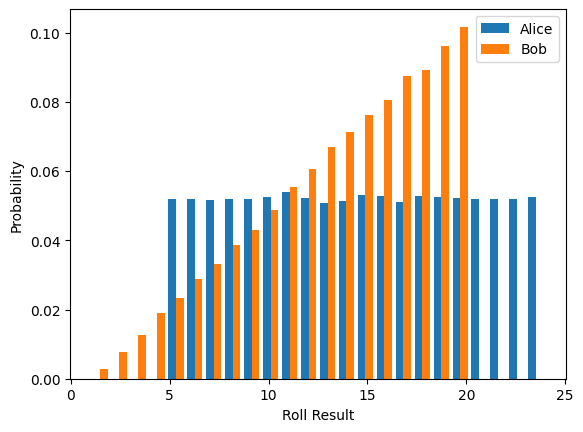

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# This function can generate the results of a given number rolls with a given modifier, with or without advantage
# n_rolls is the number of rolls to be performed
# modifier is the modifier to the roll (e.g. +3) and should be an integer
# advantage is a bool which should be True if the roll is with advantage or False if not
# The result is a list of n_rolls outcomes
# Don't worry about how the function works, unless you're interested
def roll_generator(n_rolls, modifier, advantage):
  rolls = np.random.randint(1, 21, n_rolls)

  if advantage:
    rolls2 = np.random.randint(1, 21, n_rolls)
    results = np.maximum(rolls, rolls2) + modifier
  else:
    results = rolls + modifier

  return(list(results))

# Write your code below

# Generate the rolls for Alice. 100,000 rolls with a modifier of 4 with no advantage
alice = roll_generator(100000, 4, False)
# Generate the rolls for Bob. 100,000 rolls with a modifier of 0 with advantage
bob = roll_generator(100000, 0, True)

# PLot the histogram
# Provide both alice and bob in a list so both get plotted
# Setting density to True means they-axis becomes the probability distribution as it normalises the values
# Setting bins to 25 ensures each bin represents a single outcome (1,2,3...23,24)
# Label the data series
plt.hist([alice, bob], density = True, bins = 24, label=["Alice", "Bob"])

# Label the axes
plt.xlabel("Roll Result")
plt.ylabel("Probability")

# Add a legend so we can distinguish Alice and Bob's rolls
plt.legend()

output = plt.show()

# GDP By Sector

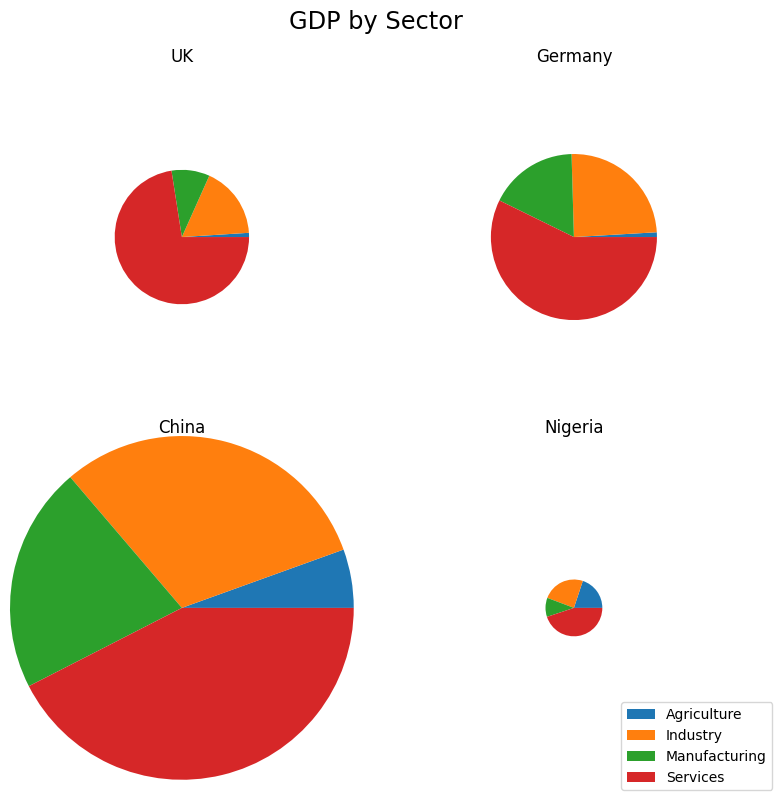

In [2]:
import matplotlib.pyplot as plt
import math

# This is one of many possible solutions
# The goal is to create four pi charts, with the area proportional to the total GDP of the country the pie chart relates to

# Create the basic data
sectors = ["Agriculture",	"Industry",	"Manufacturing",	"Services"]
uk = [28,	481,	255,	2017]
germany = [39,	1042,	734,	2432]
china = [1003,	5594,	3873,	7730]
nigeria = [99,	121,	54,	223]

# Calculate a radius for each pie chart
area_per_billion = 0.0009
uk_radius = math.sqrt(sum(uk) * area_per_billion) / math.pi
germany_radius = math.sqrt(sum(germany) * area_per_billion) / math.pi
china_radius = math.sqrt(sum(china) * area_per_billion) / math.pi
nigeria_radius = math.sqrt(sum(nigeria) * area_per_billion) / math.pi

# Create four subplots
fig, axs = plt.subplots(2,2, figsize = (8, 8))

# Add the pie chart for the UK to the upper-left subplot
# Setting labeldistance to None disables the labels on the individual pie charts
# We can set the radius of the pie chart using the radius optional argument
axs[0,0].pie(uk, labels=sectors, labeldistance=None, radius=uk_radius)
axs[0,0].set_title("UK")

# Add the pie chart for Germany to the upper-right subplot
axs[0,1].pie(germany, labels=sectors, labeldistance=None, radius=germany_radius)
axs[0,1].set_title("Germany")

# Add the pie chart for China to the lower-left subplot
axs[1,0].pie(china, labels=sectors, labeldistance=None, radius=china_radius)
axs[1,0].set_title("China")

# Add the pie chart for Nigeria to the lower-right subplot
axs[1,1].pie(nigeria, labels=sectors, labeldistance=None, radius=nigeria_radius)
axs[1,1].set_title("Nigeria")

# This command obtains the colours and label names from the Nigeria subplots
handles, labels = axs[1,1].get_legend_handles_labels()
#Create the legend
# Explicitly providing the handles and labels allows us to avoid entries for each being included from each subplot
# (Remove handles and labels if you want to see what effect they have)
# Set the location to the lower right where there's most space
fig.legend(handles, labels, loc='lower right')

# Add a title to the figure as a whole
# Make the size of the super-title very large so it stands out
fig.suptitle("GDP by Sector", size="xx-large")

# Tighten the spacing to reduce whitespace
fig.tight_layout()

# Lorenz Equations

/tmp/ipykernel_21084/467023118.py:69: MatplotlibDeprecationWarning: The dist attribute was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax_xyz.dist = 10


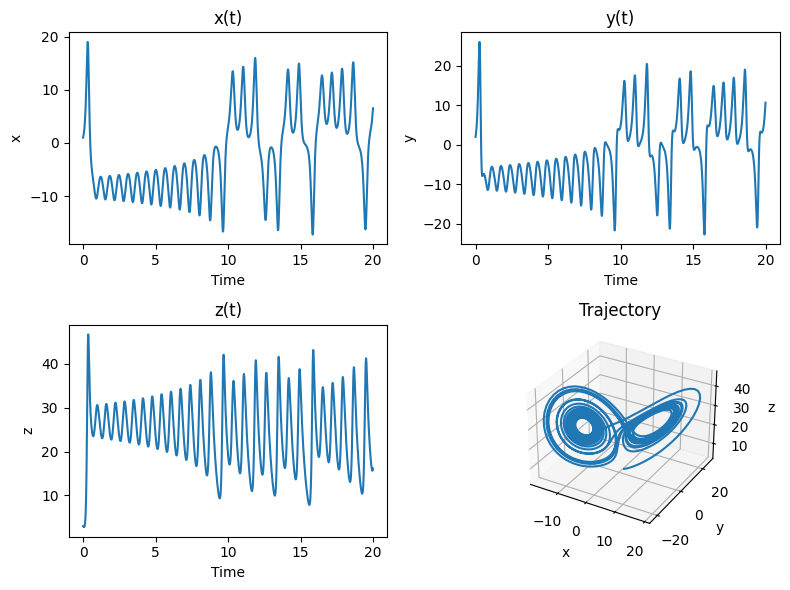

In [7]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

# This code calculates the values associated with the Lorenz system and returns the times and values of x, y and z as 4 lists
# There's no need to look at this code (unless you're interested)
def derivative(vec, t, sigma, beta, rho):
  result = np.zeros(3)

  result[0] = sigma * (vec[1] - vec[0])
  result[1] = vec[0] * (rho - vec[2]) -vec[1]
  result[2] = vec[0] * vec[1] - beta * vec[2]

  return(result)

t = np.arange(0, 20, 0.01)

initial_value = np.array([1,2,3])

sigma = 10
beta = 8/3
rho = 28

time_series = odeint(derivative, initial_value, t, args = (sigma, beta, rho))

t = list(t)
x = list(time_series[:,0])
y = list(time_series[:,1])
z = list(time_series[:,2])

# Write your code illustrating the progression of the system as a function of time below
# The lists containing the values of time, x, y and z are stored in the variables t, x, y and z respectively

# Create an empty set of subplots as we'll want to add 2D and 3D subplots
fig = plt.figure(figsize=(8, 6))

# Add the first subplot which describes x as a function of t
# When using add_subplot, we use 2, 2, 1
# This means we want two rows and two columns of subplots and we're add the top-left one
ax_x = fig.add_subplot(2, 2, 1)
ax_x.set_xlabel("Time")
ax_x.set_ylabel("x")
ax_x.set_title("x(t)")
ax_x.plot(t,x)

# Add the second subplot which describes y as a function of t
# Use 2, 2, 2 in add_subplot to add it to the top-right
ax_y = fig.add_subplot(2, 2, 2)
ax_y.set_xlabel("Time")
ax_y.set_ylabel("y")
ax_y.set_title("y(t)")
ax_y.plot(t,y)

# Add the third subplot which describes z as a function of t
# Use 2, 2, 3 in add_subplot to add it to the bottom-left
ax_z = fig.add_subplot(2, 2, 3)
ax_z.set_xlabel("Time")
ax_z.set_ylabel("z")
ax_z.set_title("z(t)")
ax_z.plot(t,z)

# Add the fourth subplot which shows the trajectory of the system
# Use 2, 2, 4 in add_subplot to add it to the bottom-right
# Set the projection to be 3D
ax_xyz = fig.add_subplot(2, 2, 4, projection='3d')
ax_xyz.plot3D(x,y,z)
ax_xyz.set_xlabel("x")
ax_xyz.set_ylabel("y")
ax_xyz.set_zlabel("z")
ax_xyz.set_title("Trajectory")

fig.tight_layout()

# Hertzsprung-Russel Diagram

Text(0, 0.5, 'Luminosity (Solar luminosities)')

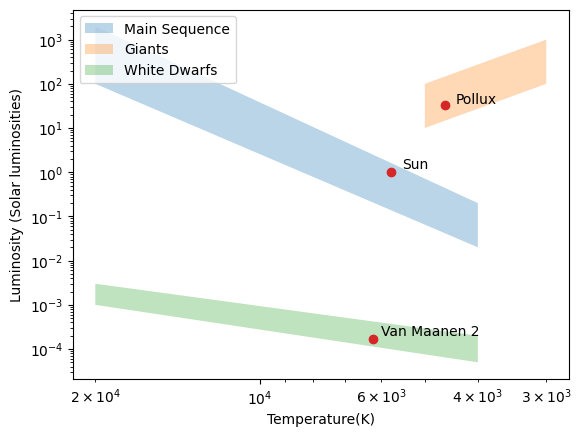

In [8]:
import matplotlib.pyplot as plt

# Create the x-values and lower and upper y-values for the bounded regions for main sequence stars
main_sequence_temperatures = [20000, 4000]
main_sequence_lower = [100,  0.02]
main_sequence_upper = [2000, 0.2]

# Create the x-values and lower and upper y-values for the bounded regions for giants
giants_temperatures = [5000, 3000]
giants_lower = [10, 100]
giants_upper = [100, 1000]

# Create the x-values and lower and upper y-values for the bounded regions for white dwarfs
white_dwarfs_temperatures = [20000, 4000]
white_dwarfs_lower = [0.001, 0.00005]
white_dwarfs_upper = [0.003, 0.0002]

# Create the temperature and luminosity coordinates for the Sun, Van Maanen 2 and Pollux
star_temperatures = [5772, 6220, 4586]
star_luminosities = [1, 0.00017, 32.7]

# Set the x and y axes to be logarithmic
plt.yscale("log")
plt.xscale("log")

# Invert the x-axis so cold temperatures are on the right and hot temperatures on the left
plt.gca().invert_xaxis()

# Create the shaded region for main sequence stars
plt.fill_between(main_sequence_temperatures, main_sequence_lower, main_sequence_upper, alpha=0.3, label="Main Sequence")
# Create the shaded region for giants
plt.fill_between(giants_temperatures, giants_lower, giants_upper, alpha=0.3, label="Giants")
# Create the shaded region for white dwarfs
plt.fill_between(white_dwarfs_temperatures, white_dwarfs_lower, white_dwarfs_upper, alpha=0.3, label="White Dwarfs")

# Plot the individual stars
plt.scatter(star_temperatures, star_luminosities)

# Add text to the figure to label each star
plt.text(5500, 1.2, "Sun")
plt.text(6000, 0.0002, "Van Maanen 2")
plt.text(4400, 35, "Pollux")

# Add a legend
# Set loc to 2 to move it to the top left
plt.legend(loc=2)

# Label the axes
plt.xlabel("Temperature(K)")
plt.ylabel("Luminosity (Solar luminosities)")

# Matplotlib in Functions

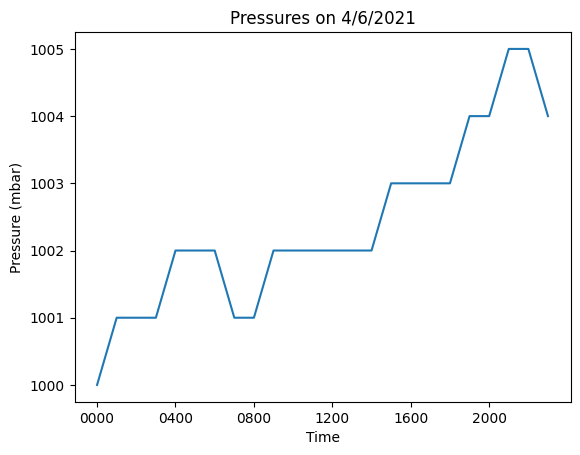

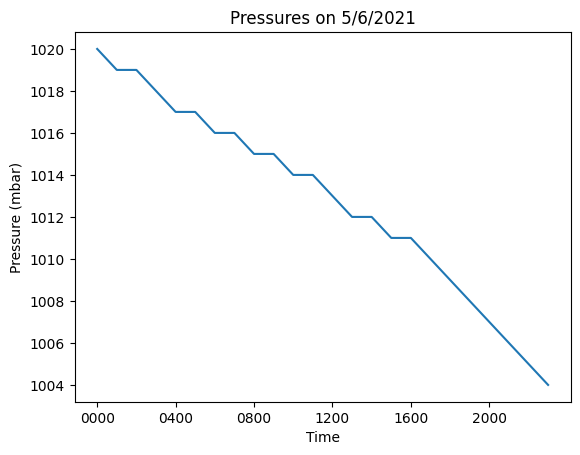

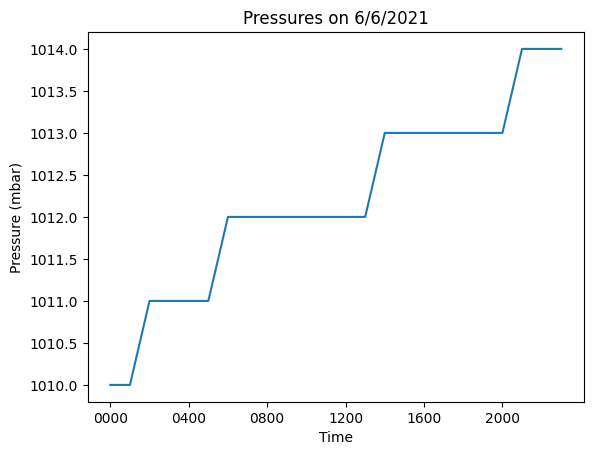

In [9]:
import matplotlib.pyplot as plt

def daily_pressure_plotter(pressures, day, month, year):
  # Create a new figure
  fig = plt.figure()
  #Create a new set of axes in the figure
  ax = plt.axes()
  
  # Create an array of times relating to the times of the pressure readings
  times = ["0000", "0100", "0200", "0300", "0400", "0500", "0600", "0700", "0800", "0900", "1000", "1100", "1200", "1300", "1400", "1500", "1600", "1700", "1800", "1900", "2000", "2100", "2200", "2300"]

  # Plot the times and pressures
  ax.plot(times, pressures)

  # Set the x-axis ticks to plotted every four hours
  ax.set_xticks(times[::4])
  ax.set_xticklabels(times[::4])

  # Set the x-labels, y-labels and title
  ax.set_xlabel("Time")
  ax.set_ylabel("Pressure (mbar)")
  ax.set_title("Pressures on " + str(day) + "/" + str(month) + "/" + str(year))

  # Construct a filename
  # Use the format yyyy-mm-yy so the figures will be in date order when order alphabetically
  filename = "pressure-" + str(year) + "-" + str(month) + "-" + str(day)

  # Save the file
  fig.savefig(filename)

pressures_fourth = [1000, 1001, 1001, 1001, 1002, 1002, 1002, 1001, 1001, 1002, 1002, 1002, 1002, 1002, 1002, 1003, 1003, 1003, 1003, 1004, 1004, 1005, 1005, 1004]
daily_pressure_plotter(pressures_fourth, 4, 6, 2021)

pressures_fifth = [1020, 1019, 1019, 1018, 1017, 1017, 1016, 1016, 1015, 1015, 1014, 1014, 1013, 1012, 1012, 1011, 1011, 1010, 1009, 1008, 1007, 1006, 1005, 1004]
daily_pressure_plotter(pressures_fifth, 5, 6, 2021)

pressures_sixth = [1010, 1010, 1011, 1011, 1011, 1011, 1012, 1012, 1012, 1012, 1012, 1012, 1012, 1012, 1013, 1013, 1013, 1013, 1013, 1013, 1013, 1014, 1014, 1014]
daily_pressure_plotter(pressures_sixth, 6, 6, 2021)